# Classification report generator

All in one classification tester generates reports 

## History 

### SMA analysis results:

Model score: 0.9640625

|           |   precision  |  recall | f1-score  | support|
| ---: | :---:|:---:|:---:|:---:|
|           0 |      0.96 |     1.00    |  0.98   |   5475 |
|           1 |      0.94 |     0.29    |  0.45   |    285 |
|||||
|    accuracy |           |             |  0.96   |   5760|
|   macro avg |      0.95 |     0.65    |  0.71   |   5760|
|weighted avg |      0.96 |     0.96    |  0.95   |   5760|


- accuracy: 0.9356250000000002
- precision: 0.14149963865126186
- recall: 0.05499903213317847
- f1: 0.07385725755280738

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Functions and constants
# Put models in a dictonary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def generate_report(X_train, X_test, y_train, y_test):
    """
    renerates report with default RandomForestClassifier paramaters
    """
    np.random.seed(42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    print(f"Model score: {model.score(X_test, y_test)}")
    plot_roc_curve(model, X_test, y_test)
    plot_conf_mat(y_test, y_preds)
    print(classification_report(y_test, y_preds))
    
    print("===========CROSS VALIDATED METRICS===========")
    print(f"accuracy: {cross_validated_metric(model, 'accuracy')}")
    print(f"precision: {cross_validated_metric(model, 'precision')}")
    print(f"recall: {cross_validated_metric(model, 'recall')}")
    print(f"f1: {cross_validated_metric(model, 'f1')}")
    
    print("Fact sheet:")
    print("Accuracy:")
    print("Precision: Portion of guessed positives that are actually correct")
    print("Recall: Portion of actual positives that are guessed correct")
    print("F1: Balance, use if uneven class distribution (ie large # actual negatives)")
          
    
    print("===========FEATURE IMPORTANCE===========")
    feature_dict = dict(zip(X_train.columns, list(model.feature_importances_)))
    feature_df = pd.DataFrame(feature_dict, index=[0])
    feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(10, 6));
    
    

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    sns.set(font_scale = 1.5)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
def cross_validated_metric(model, metric:str)->float:
    """
    returns the cross-validated (5) metric for any valid metric
    Common accepted ones: 
     - 'accuracy'
     - 'precision'
     - 'recall'
     - 'f1'
     """
    cv_metric = cross_val_score(model, X, y, cv=5, scoring=metric)
    return np.mean(cv_metric)

## Import file

In [11]:
df = pd.read_csv("data/classification_test.csv")
df_ft = df[29000:]
df_ft = df_ft.dropna()
df = df[0:29000] #To not forward test
df = df.dropna()
len(df)

28800

In [12]:
# Split data into X and y
X = df.drop(["target", "close"], axis=1)
# X = df[["volume_adi", "volume_obv", "volume_nvi", "volatility_atr", "volatility_bbh", "others_cr"]].copy()
y = df["target"]

# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
#
generate_report(X_train, X_test, y_train, y_test)

## Past reports

Model score: 0.9640625
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5475
           1       0.94      0.29      0.45       285

    accuracy                           0.96      5760
   macro avg       0.95      0.65      0.71      5760
weighted avg       0.96      0.96      0.95      5760

===========CROSS VALIDATED METRICS===========
accuracy: 0.9356250000000002
precision: 0.14149963865126186
recall: 0.05499903213317847
f1: 0.07385725755280738
===========FEATURE IMPORTANCE===========


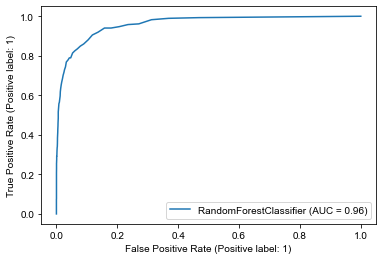

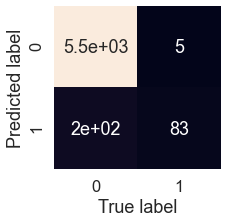

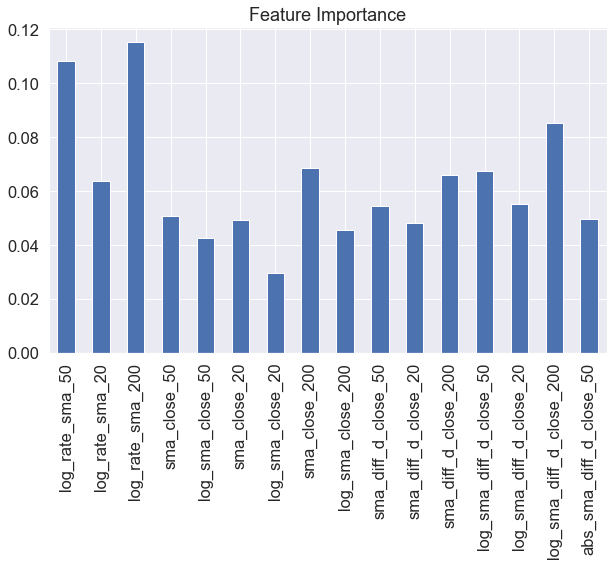

In [5]:
# SMA Analysis
generate_report(X_train, X_test, y_train, y_test)

## Forward testing

In [13]:
# Forward test
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9631944444444445

In [18]:
results = model.predict(df_ft.drop(["target", "close"], axis=1))
df_ft["results"] = results

In [86]:
df_ft["scatter_results"] = list(map(lambda x, c: c if x == 1 else None, df_ft["results"], df_ft["close"]))
df_ft["s_correct"] = list(map(lambda x, t, c: c if x == 1 and t == 1 else None, df_ft["results"], df_ft["target"], df_ft["close"]))
df_ft["s_wrong"] = list(map(lambda x, t, c: c if x == 1 and t == 0 else None, df_ft["results"], df_ft["target"], df_ft["close"]))
df_ft["s_missed"] = list(map(lambda x, t, c: c if x == 0 and t == 1 else None, df_ft["results"], df_ft["target"], df_ft["close"]))


In [88]:
plot = df_ft[:]

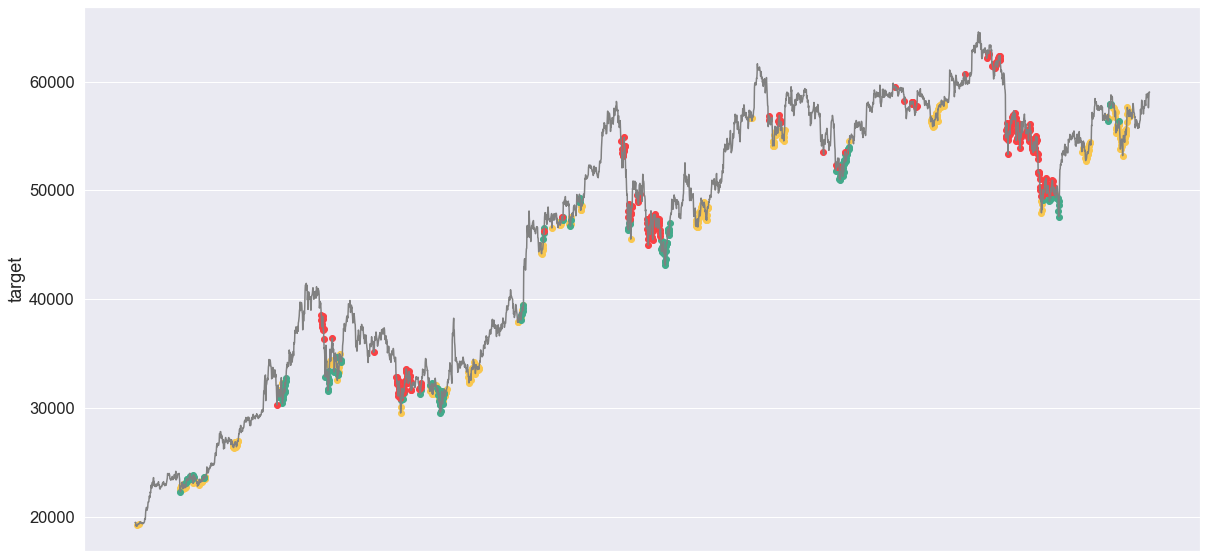

In [104]:
fig,ax = plt.subplots(figsize=(20, 10))
# ax.scatter(range(len(plot)), 
#            plot.scatter_results,
#         color="#43aa8b")

ax.scatter(range(len(plot)), 
           plot.s_missed,
        color="#f9c74f")

ax.scatter(range(len(plot)), 
           plot.s_correct,
        color="#43aa8b")

ax.scatter(range(len(plot)), 
           plot.s_wrong,
        color="#f94144")

ax.set_xlabel("time")
ax.set_ylabel("target")

ax.tick_params(labelbottom=False)    
ax.axes.xaxis.set_visible(False)

# Scatter
ax.plot(range(len(plot)),
         plot.close,
         color="gray")


# ax2=ax.twinx()
# ax2.plot(range(len(plot)),
#          plot.close,
#          color="gray")
# ax2.set_ylabel("close")

# ax3=ax.twinx()
# ax3.plot(plot.target,
#          color="white")
# ax3.set_ylabel("close")
plt.show()